In [315]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

df = pd.read_csv('cleaned dataset.csv', index_col='datetime')
df

,main.temp,main.pressure,main.humidity,clouds.all,wind.speed,weather.Clear,weather.Clouds,weather.Rain
datetime,,,,,,,,
2023-11-06 15:45:57+08:00,33.36,1010.0,68.0,20.0,4.02,0.0,1.0,0.0
2023-11-06 15:47:35+08:00,30.00,1009.0,74.0,81.0,2.06,0.0,1.0,0.0
2023-11-06 15:38:29+08:00,33.32,1010.0,66.0,20.0,2.57,0.0,1.0,0.0
2023-11-06 15:39:56+08:00,33.33,1010.0,66.0,50.0,0.89,0.0,1.0,0.0
2023-11-06 18:01:20+08:00,31.10,1010.0,72.0,20.0,4.12,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
2023-11-23 21:05:10+08:00,26.94,1012.0,88.0,99.0,2.50,0.0,0.0,1.0
2023-11-24 00:01:24+08:00,27.12,1012.0,91.0,75.0,1.54,0.0,1.0,0.0
2023-11-24 00:03:06+08:00,26.03,1011.0,82.0,55.0,1.90,0.0,1.0,0.0


In [316]:

# Separate features (except temperature) into weather_x
camanava_x = df.drop(columns=['main.temp'])

# Separate temperature column into weather_y
camanava_y = df[['main.temp']]

# Display the shapes of the new DataFrames
print("Shape of camanava_x:", camanava_x.shape)
print("Shape of camanava_y:", camanava_y.shape)
#camanava_y.head()


Shape of camanava_x: (420, 7)
Shape of camanava_y: (420, 1)


In [317]:
camanava_x.columns

Index(['main.pressure', 'main.humidity', 'clouds.all', 'wind.speed',
       'weather.Clear', 'weather.Clouds', 'weather.Rain'],
      dtype='object')

Index(['main.pressure', 'main.humidity', 'clouds.all', 'wind.speed',
       'weather.Clear', 'weather.Clouds', 'weather.Rain'],
      dtype='object')


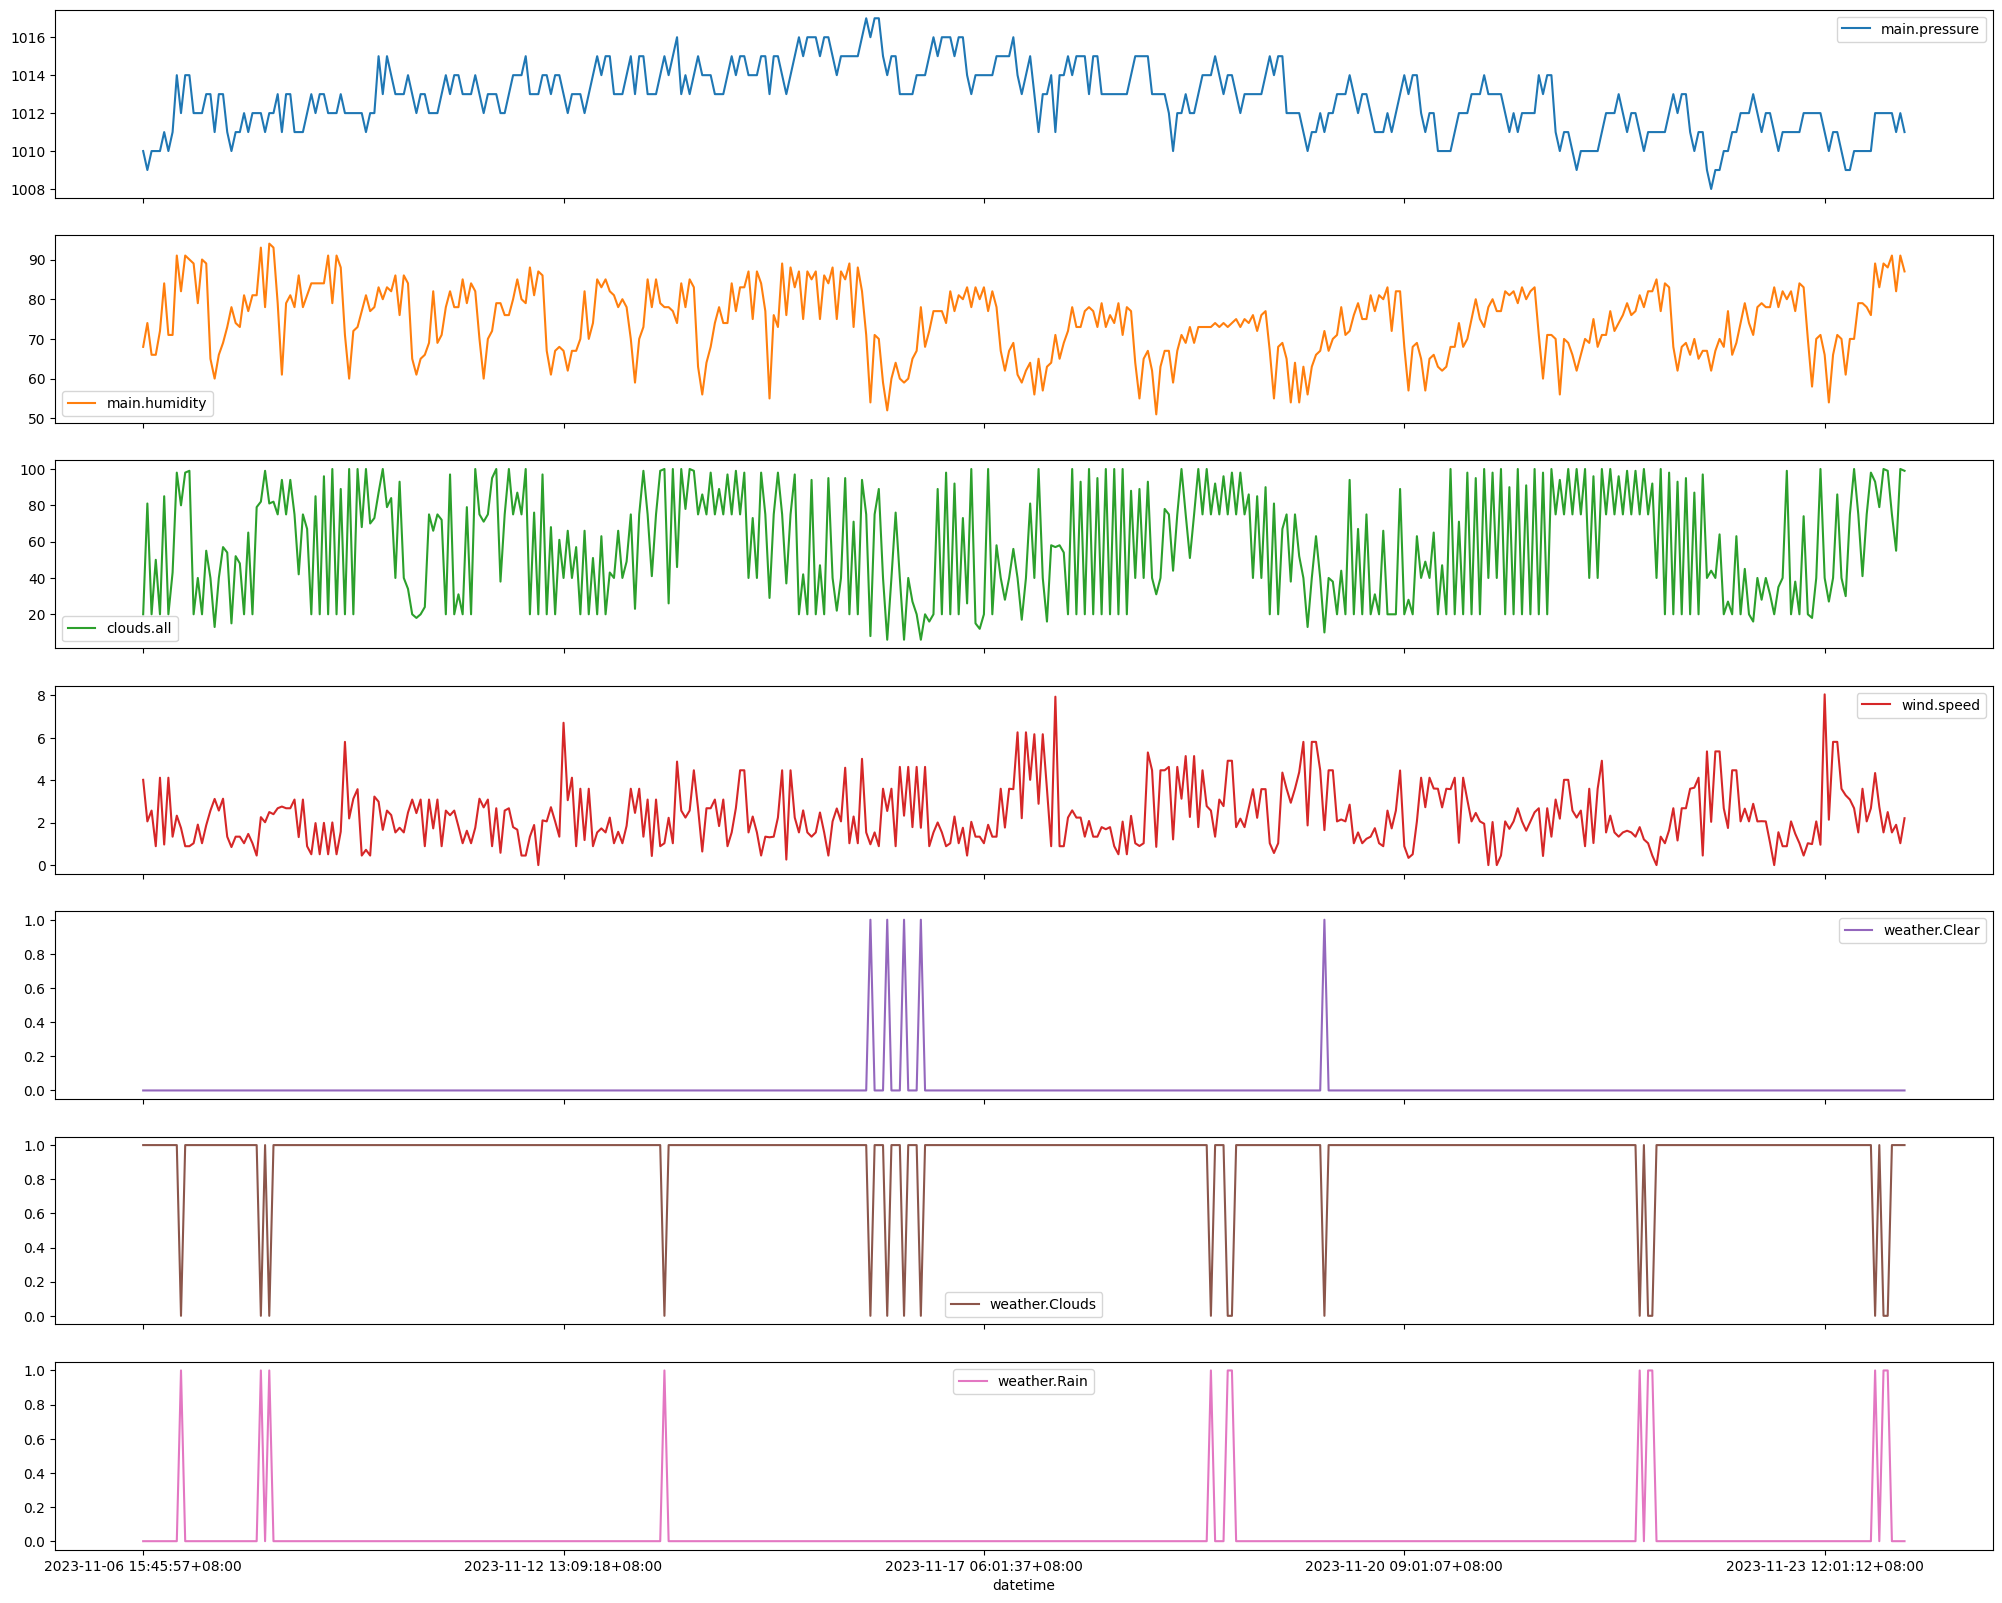

In [318]:
import matplotlib.pyplot as plt
camanava_xnum = camanava_x.apply(pd.to_numeric, errors='ignore')
# Select only numerical features 
camanava_features = camanava_xnum .select_dtypes(include=['float64', 'int64'])
print(camanava_features.columns)
# Plot all features in separate subplots
camanava_features .plot(subplots=True, figsize=(25, 20))
plt.show()


In [319]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(camanava_x, camanava_y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)


Mean Squared Error: 2.2904668356797253


In [320]:
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)


Shape of y_test: (84, 1)
Shape of y_pred: (84, 1)


In [321]:
#  Actual and Predicted values along with their differences
results = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten(), 'Difference': (y_test.values - y_pred).flatten()})
print("Actual vs Predicted:")
results.index = X_test.index  
results


Actual vs Predicted:


,Actual,Predicted,Difference
datetime,,,
2023-11-15 06:03:27+08:00,26.03,28.064210,-2.034210
2023-11-21 09:03:25+08:00,28.83,29.125454,-0.295454
2023-11-16 09:04:58+08:00,30.26,28.629260,1.630740
2023-11-22 12:02:50+08:00,27.43,29.219645,-1.789645
2023-11-24 00:01:24+08:00,27.12,24.911575,2.208425
...,...,...,...
2023-11-23 18:01:19+08:00,29.44,27.143188,2.296812
2023-11-10 00:03:19+08:00,26.66,26.877731,-0.217731
2023-11-23 18:05:07+08:00,29.42,27.845719,1.574281
